Detailed Report using Naive Bayes Classifier
Percentage of tweets that are Negative : 32.71028037383177%
Percentage of tweets that are Positive : 41.1214953271028%
Percentage of tweets that are Neutral : 26.168224299065418%
Accuracy of Naive Bayes Classifier:35.51401869158878%


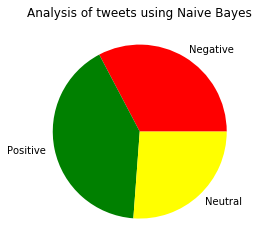

In [18]:
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('AT_USER')
stopwords.append('URL')

def getFeatureVector(tweet):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word stats with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        if(w in stopwords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector

pd.set_option('mode.chained_assignment', None)

data=pd.read_csv('processed_tweets.csv')
data.loc[:,'Sentiment']='neutral'
for i in range(0,len(data)):
    sie=SentimentIntensityAnalyzer()
    if sie.polarity_scores(data.iloc[:,0][i])['compound'] == 0.0:
        data.iloc[:,-1][i]='neutral'
    elif sie.polarity_scores(data.iloc[:,0][i])['compound'] < 0.0:
        data.iloc[:,-1][i]='negative'
    else:
        data.iloc[:,-1][i]='positive'
    
data.to_csv('final_dataset.csv',index=None)

#Training Phase
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)
t=vectorizer.fit_transform(data.iloc[:,0].values)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.iloc[:,-1]=le.fit_transform(data.iloc[:,-1])

#Training for Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NBclassifier=MultinomialNB()
NBclassifier.fit(t,data.iloc[:,-1])
#Testing for Naive Bayes
test_tweets=data.iloc[:,0]
test_vector=vectorizer.transform(test_tweets)
arr=le.inverse_transform(NBclassifier.predict(test_vector))

count_neg=0
count_p=0
count_neu=0

for i in arr:
    if(i=='neutral'):
        count_neu+=1
    if(i=='positive'):
        count_p+=1
    if(i=='negative'):
        count_neg+=1
        
    

neg_perc=count_neg/len(data)*100
pos_perc=count_p/len(data)*100
neu_perc=count_neu/len(data)*100

accuracy = (neg_perc + pos_perc + neg_perc)/3
import matplotlib.pyplot as plt
labels = ['Negative','Positive','Neutral']
sizes = [count_neg,count_p,count_neu]
colors=['red','green','yellow']
plt.pie(sizes, labels=labels,colors=colors)
plt.title('Analysis of tweets using Naive Bayes')
plt.savefig('tweets.png')

print("Detailed Report using Naive Bayes Classifier")
print("Percentage of tweets that are Negative : "+str(neg_perc)+'%')
print("Percentage of tweets that are Positive : "+str(pos_perc)+'%')
print("Percentage of tweets that are Neutral : "+str(neu_perc)+'%')
print("Accuracy of Naive Bayes Classifier:" + str(accuracy) + '%')
